In [42]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math


dir = './POSTPRO/'
prenom = 'CONTACT_FORCE_DISTRIBUTION_'
coor = 'COORDINATION_NUMBER.DAT'

In [45]:
n = 300
dt = 1e-3
data_tot = np.zeros((5, n-1))
for i in range(1, n):
    nom = dir + prenom + '0'*int(np.ceil(6-np.log10(i))) + str(i) + '.DAT'
    data = np.loadtxt(nom).reshape(-1,1)
    data = np.vstack((i*dt, data))
    data_tot[:,i-1] = data[:,0]


In [46]:
data_tot_df = pd.DataFrame(data_tot.T, columns=['t', 'Vr', 'Nr', 'Vn', 'Nn'])
fixed_df = data_tot_df[data_tot_df['Vr'] != -math.inf]
fixed_df.head()

,t,Vr,Nr,Vn,Nn
0,0.001,27.318540,183.0,27.765331,183.0
1,0.002,9.941783,182.0,10.005664,182.0
2,0.003,8.777864,129.0,8.838377,129.0
3,0.004,5.207427,181.0,5.318862,181.0
4,0.005,8.808650,180.0,8.996922,180.0


<AxesSubplot:title={'center':'Vr'}, xlabel='t'>

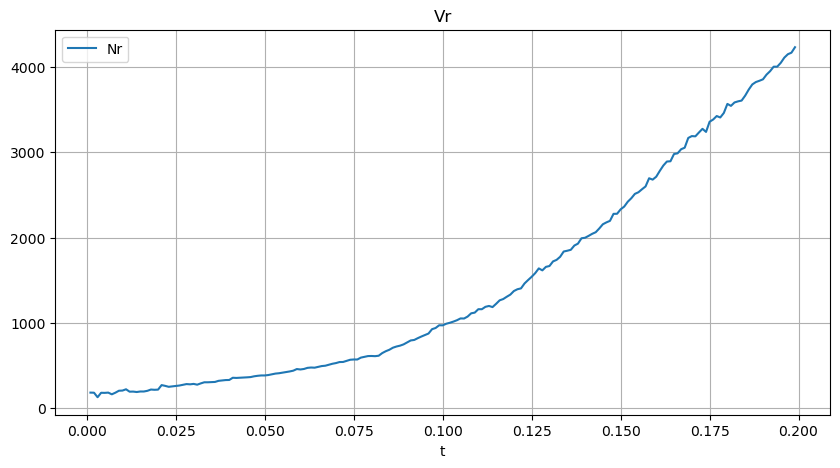

In [47]:
fixed_df[fixed_df['t']<0.2].plot(x='t', y='Nr', figsize=(10,5), grid=True, title='Vr')

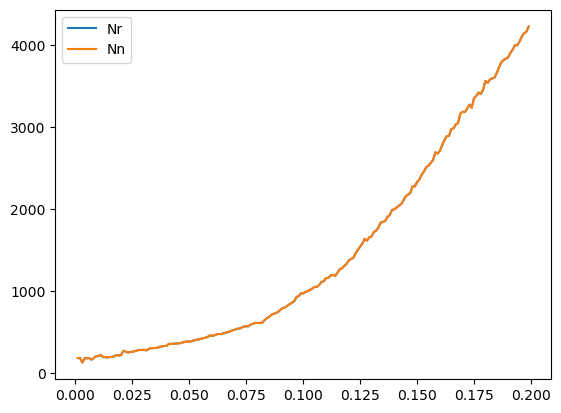

In [48]:
plt.figure()
plt.plot(fixed_df['t'][fixed_df['t']<0.2], fixed_df['Nr'][fixed_df['t']<0.2], label='Nr')
plt.plot(fixed_df['t'][fixed_df['t']<0.2], fixed_df['Nn'][fixed_df['t']<0.2], label='Nn')
plt.legend()

In [49]:
coordination = np.loadtxt(dir+coor)
coordination_df = pd.DataFrame(coordination, columns=['t', 'c_0','c_+', 'c_-', 'c'])

In [50]:
coordination_df.head()

,t,c_0,c_+,c_-,c
0,0.01,0.329833,1.043689,0.0,1.043689
1,0.02,0.329833,1.039801,0.0,1.039801
2,0.03,0.329833,1.030075,0.0,1.030075
3,0.04,0.329833,1.050562,0.0,1.050562
4,0.05,0.329833,1.038710,0.0,1.038710


<AxesSubplot:title={'center':'Coordination number'}, xlabel='t'>

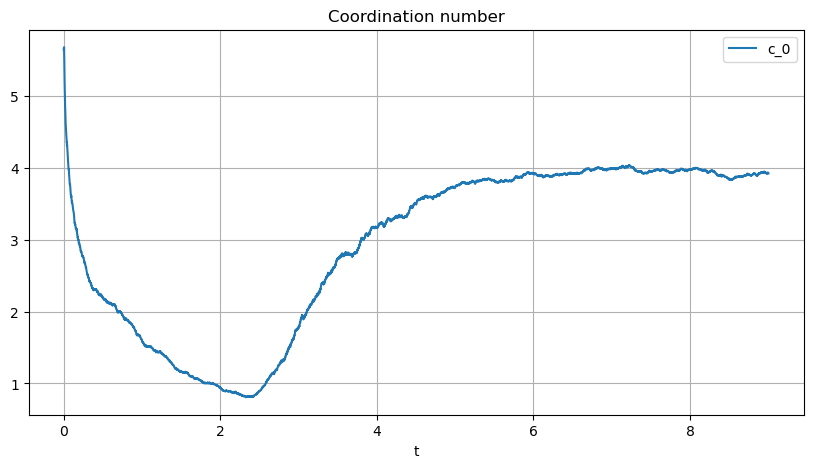

In [110]:
coordination_df.plot(x='t', y='c_0', figsize=(10,5), grid=True, title='Coordination number')

In [3]:
from pylmgc90 import pre
import math

In [4]:
# 3D firstfall
dim = 3

## geometric params
ptype = 'SPHER' # particle type
Rmin = 2 # minimum radius of particles
Rmax = 5 # maximum radius of particles

Px = 30*Rmax # width of the particle generation
Py = 5*Rmax # height of the particle generation
Pz = 10*Rmax # depth of the particle generation

lx = 50*Rmax # width of the domain
ly = 30*Rmax # height of the domain
lz = 30*Rmax # depth of the domain

nb_particles = 300 # number of particles
pp = 0.3 # particle-particle friction
pw = 0.5 # particle-wall friction


## containers definitions:
bodies = pre.avatars() # container for bodies
mats = pre.materials() # container for materials
mods = pre.models() # container for models
svs = pre.see_tables() # container for see tables
tacts = pre.tact_behavs() # container for tact behaviors

## create materials
# print(pre.config.lmgc90dicts.bulkBehavOptions['RIGID'])
tdur = pre.material(name='TDURx', materialType='RIGID', density=1000.)
plex = pre.material(name='PLEXx', materialType='RIGID', density=5.)
mats.addMaterial(tdur,plex)


## create a model of rigid
mod = pre.model(name='rigid',physics='MECAx',element='Rxx3D',dimension=dim)
mods.addModel(mod)

## creation of the walls

down = pre.rigidPlan(axe1=lx/2.,axe2=lz/2.,axe3=Rmax/2.,center=[0.,0.,0.],
                   material=tdur,model=mod,color='WALLx')

down.rotate(description='axis',alpha=math.pi/2.,axis=[1.,0.,0.],center=down.nodes[1].coor)
down.translate(dy=-ly/2.,dz=lz/2.)
bodies.addAvatar(down)


In [14]:
help(down.rotate)

Help on method rotate in module pylmgc90.pre.avatar.avatar:

rotate(description='Euler', phi=0.0, theta=0.0, psi=0.0, alpha=0.0, axis=[0.0, 0.0, 1.0], center=[0.0, 0.0, 0.0]) method of pylmgc90.pre.avatar.avatar.avatar instance
    rotate(self, description='Euler', phi=0., theta=0., psi=0., alpha=0., axis=[0., 0., 1.], center=[0., 0., 0.])
    
    this function rotates the considered avatar, according to the given rotation parameters and a
    rotation center. Supported rotation paramters are: Euler's angles or an axis and an angle
    
    parameters:
    
    - self: the avatar itself
    - description='Euler': defines the rotation parameters:
    
      - if description = 'Euler', the rotation uses Euler's angles, consequently only phi, theta, psi and
        center are considered
      - if description = 'axis', the rotation uses an axis and an angle, consequently only axis, alpha and
        center are considered
    - phi: first Euler's angle (rotation with respect to z-axis)
  

In [13]:
np.random.rand(1)


array([0.76439428])

In [22]:
import math

min_vert = 18
max_vert = 25
nb_each  = 7

rmin = 1.
rmax = 5

nb_poly = (max_vert - min_vert + 1) * nb_each
nb_box_ele = int( math.ceil( nb_poly**(1./3.) ) )

In [26]:
coors = pre.cubicLattice3D( nb_box_ele, nb_box_ele, nb_box_ele, 2.*max(rmin,rmax) )


In [29]:
help(pre.cubicLattice3D)

Help on function cubicLattice3D in module pylmgc90.pre.build_avatar.lattices3D:

cubicLattice3D(nb_ele_x, nb_ele_y, nb_layer, l, x0=0.0, y0=0.0, z0=0.0)
    coor=cubicLattice3D(nb_ele_x, nb_ele_y, nb_layer, l, x0=0., y0=0., z0=0.):
    
    this function compute a list of positions on a cubic lattice
    
    parameters:
    
    - nb_ele_x: number of particles on the first layer, following axis (Ox) (the lowest)
    - nb_ele_z: number of particles on the first layer, following axis (Oz) (the lowest)
    - nb_layer: number of layers
    - l: length of a lattice element, i.e. distance between two 
      consecutive positions on the same layer, or the same column
    
    optional parameters:
    
    - (x0, y0, z0): position of the lower left corner of the bounding box 
      of the lattice, i.e. the first position is (x0 + l/2, y0 + l/2, z0 + l/2)
    
    return value:
    
    - coordinates of the positions [x1, y1, z1, x2, y2, z2, ...]
    
    N.B.: the total number of positions is

In [39]:
import os, sys
import numpy as np
import math
import shutil

from pylmgc90 import pre

if not os.path.isdir('./DATBOX'):
  os.mkdir('./DATBOX')
if os.path.isdir('./DISPLAY'):
  shutil.rmtree('./DISPLAY')
if os.path.isdir('./POSTPRO'):
  shutil.rmtree('./POSTPRO')
if os.path.isdir('./OUTBOX'):
  shutil.rmtree('./OUTBOX')


# 3D firstfall
dim = 3

## geometric params
ptype = 'POLYR' # particle type
Rmin = 2 # minimum radius of particles
Rmax = 3 # maximum radius of particles
min_vert = 6 # minimum number of vertices
max_vert = 12 # maximum number of vertices
per_layer = 200 # minimum number of particles per layer
layers = 3 # number of layers



Px = 45*Rmax # width of the particle generation
Py = 25*Rmax # height of the particle generation
Pz = 5*Rmax # depth of the particle generation

lx = 65*Rmax # width of the domain
ly = 55*Rmax # height of the domain
lz = 45*Rmax # depth of the domain

nb_particles = 200 # number of particles
pp = 0.3 # particle-particle friction
pw = 0.5 # particle-wall friction


## containers definitions:
bodies = pre.avatars() # container for bodies
mats = pre.materials() # container for materials
mods = pre.models() # container for models
svs = pre.see_tables() # container for see tables
tacts = pre.tact_behavs() # container for tact behaviors

#### create materials
# print(pre.config.lmgc90dicts.bulkBehavOptions['RIGID'])
tdur = pre.material(name='TDURx', materialType='RIGID', density=1000.)
plex = pre.material(name='PLEXx', materialType='RIGID', density=500.)
mats.addMaterial(tdur,plex)


## create a model of rigid
mod = pre.model(name='rigid',physics='MECAx',element='Rxx3D',dimension=dim)
mods.addModel(mod)



#### wall avatar generation
down = pre.rigidPlan(axe1=lx/2.,axe2=lz/2.,axe3=Rmax/2.,center=[0.,0.,0.],
                   material=tdur,model=mod,color='WALLx')
#down.rotate(description='axis',alpha=math.pi/2.,axis=[1.,0.,0.],center=down.nodes[1].coor)
#down.translate(dy=-ly/2.,dz=lz/2.)
bodies.addAvatar(down)



#### ballast avatar generation
layers = [1, 0.75, 0.5]
layersx = [1, 0.99, 0.98]
# for j in range(len(layers)):
#   [nb_rem,coors] = pre.depositInBox3D(radii,Px,Py*layers[j],Pz)
#   for i in range(nb_rem):
#       if ptype == 'POLYR':
#           body = pre.rigidPolyhedron(radius=radii[i], center=coors[3*i : 3*(i+1)], nb_vertices=6, generation_type='random',model=mod,
#                             material=plex, color='BLUEx')
#       else:
#           body = pre.rigidSphere(r=radii[i],center=coors[3*i:3*(i+1)],model=mod,
#                             material=plex,color='BLUEx')
#           bodies.addAvatar(body)

#       body.translate(dz=Pz*(j)/2. + Rmax/2.)
#       # body.rotate(description='Euler',phi=2.*math.pi*np.random.rand(1),psi=2.*math.pi*np.random.rand(1),
#       #             center=body.nodes[1].coor)
#       #body.imposeInitValue(component=2,value=-20.0) # velocity imposed on the particle in y direction
#       #body.imposeInitValue(component=1,value=-20.0) # velocity imposed on the particle in x direction
#       bodies.addAvatar(body)


#### ballast avatar generation part 2
radii = pre.granulo_Random(nb_particles,Rmin,Rmax)
radii.shape

(200,)

In [41]:
radii[0]

2.0858012864176647